<a href="https://colab.research.google.com/github/nrmalfn/data_science_portfolio/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_assignment/HO_day_12/spotify_dataset.csv')

df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Histogram

Text(0.5, 1.0, 'Histogram Popularity')

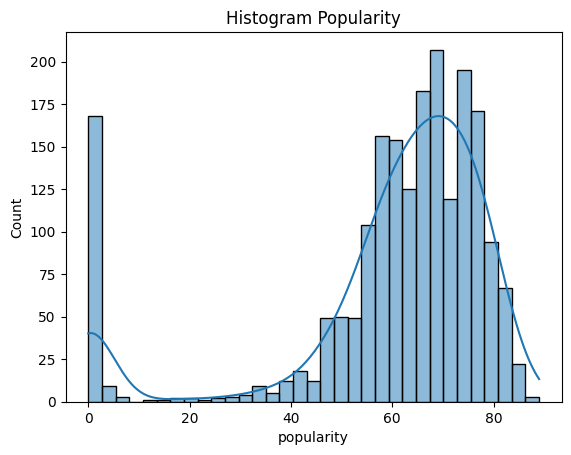

In [ ]:
sns.histplot(data = df, x = "popularity", kde=True)
plt.title("Histogram Popularity")

# Line Chart

In [ ]:
df_year = df[['year', 'song']]
df_year

,year,song
0,2000,Oops!...I Did It Again
1,1999,All The Small Things
2,1999,Breathe
3,2000,It's My Life
4,2000,Bye Bye Bye
...,...,...
1995,2019,Sucker
1996,2019,Cruel Summer
1997,2019,The Git Up
1998,2019,Dancing With A Stranger (with Normani)


In [ ]:
df_yearly = df_year.groupby('year', as_index=False).count()
df_yearly

,year,song
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


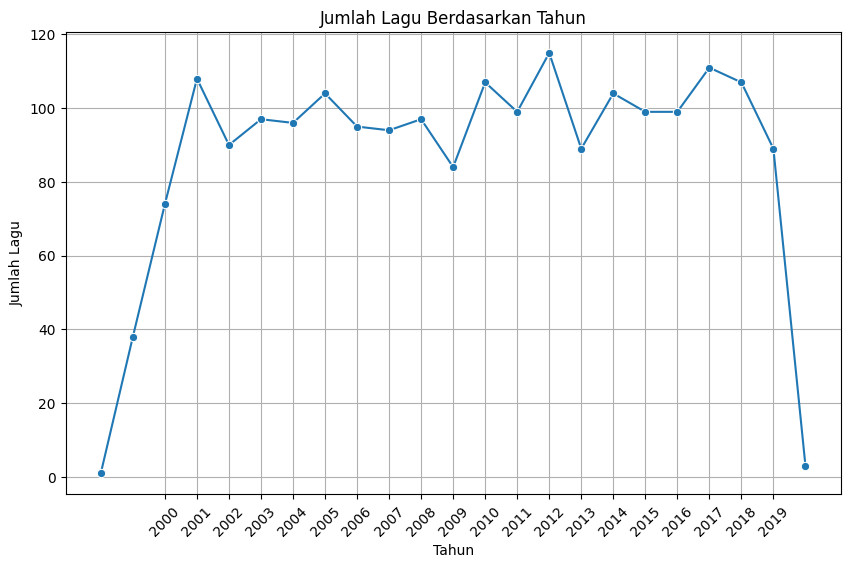

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_yearly, x='year', y='song', marker='o')
plt.xticks(range(2000, 2020, 1)) # range(nilai awal, nilai akhir - 1, rentang)
plt.xticks(rotation=45)
plt.title('Jumlah Lagu Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Lagu')
plt.grid()

# Bar Chart

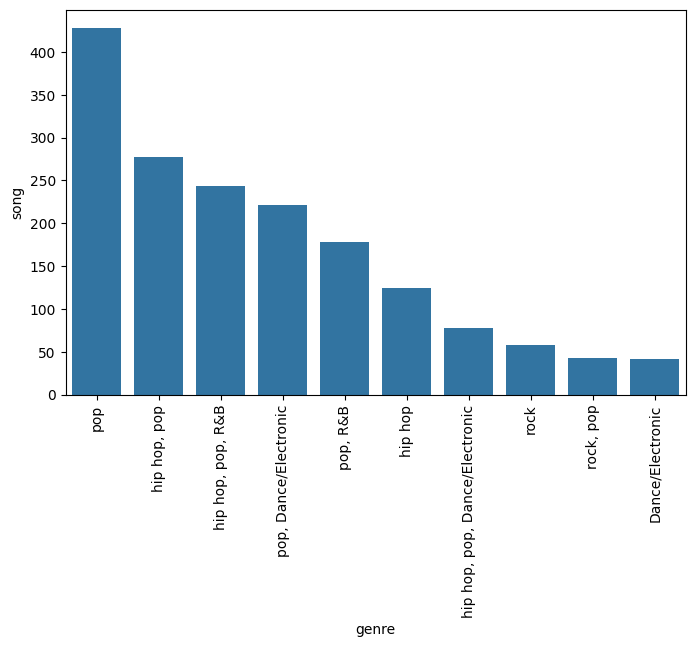

In [ ]:
df_genre_count = df.groupby('genre', as_index=False).count().sort_values(by='song', ascending=False)

df_genre_count_top10 = df_genre_count.head(10)

plt.figure(figsize=(8, 5))

sns.barplot(data=df_genre_count_top10, x='genre', y='song')
plt.xticks(rotation=90)
plt.show()

# Pie Chart

In [ ]:
grouped_df = df.groupby('explicit', as_index=False).count()
grouped_df

,explicit,artist,song,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,False,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
1,True,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551,551


([<matplotlib.patches.Wedge at 0x7d93f49cc7f0>,
 [Text(-0.7130780864241404, 0.8375676943756167, 'False'),
  Text(0.7130780864241403, -0.8375676943756168, 'True')],
 [Text(-0.45377696408808926, 0.5329976236935742, '72.45%'),
  Text(0.4537769640880892, -0.5329976236935743, '27.55%')])

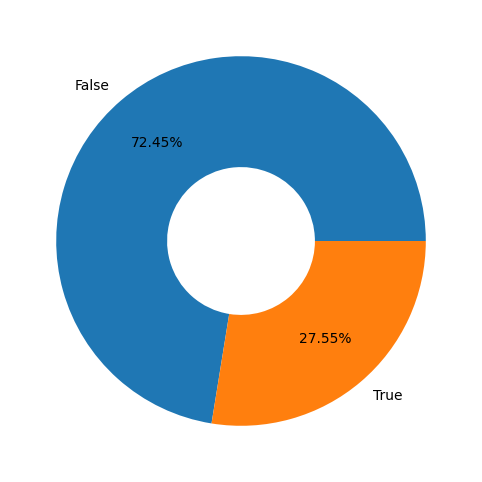

In [ ]:
fig = plt.subplots(figsize=(10, 6))

plt.pie(x=grouped_df['song'], labels=grouped_df['explicit'], autopct='%.2f%%', pctdistance=0.7, wedgeprops=dict(width=0.6))

# Scatter Plot

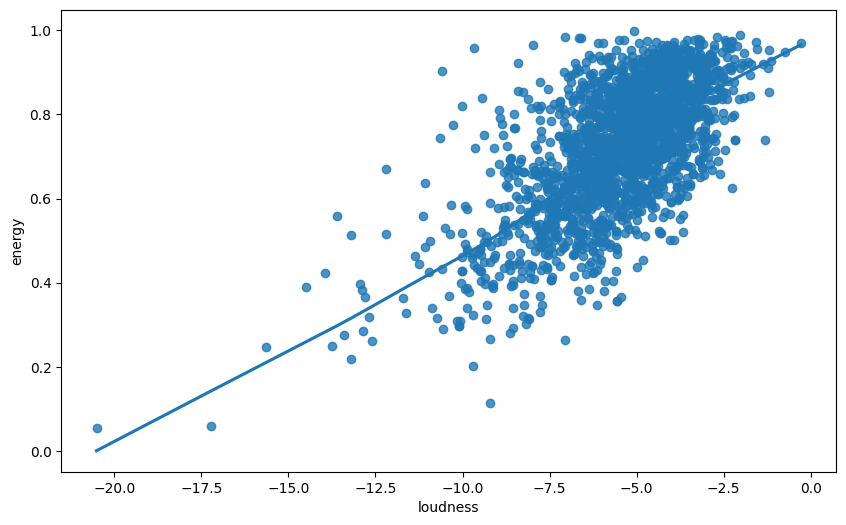

In [ ]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(data=df, x='loudness', y='energy', lowess=True)

plt.show()